In [40]:
!pip install matplotlib==3.4.1

In [41]:
!pip install pycaret

In [42]:
!pip install shap

In [43]:
!pip install explainerdashboard==0.2.20.1

In [44]:
from pycaret.regression import *
#from pycaret.classification import *
from pycaret.utils import check_metric
from pycaret.utils import enable_colab
import pandas as pd 
import numpy as np
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
import shap
import matplotlib.pyplot as plt
enable_colab()

Colab mode enabled.


In [45]:
df0 = pd.read_excel('Datos_klebsiella.xlsx')

In [46]:
df0.columns

Index(['Bacteria', 'Country', 'Region', 'Code', 'Year',
       'Aminoglycosides_r_percentage', 'Carbapenems_r_percentage',
       'Fluoroquinolones_r_percentage',
       'Third-generation cephalosporins_r_percentage', 'R_multi',
       'DDD_sys_commun', 'per_cap_US', 'GDP_total', 'GDP_health',
       'Out_pocket_exp', 'income_pc', 'rural_pop', 'HDI', 'ctrl_corrup',
       'GOV_effect', 'rule_law', 'total_pop'],
      dtype='object')

In [47]:
df0.head()

Bacteria  Country   Region Code  Year  \
0  Klebsiella pneumoniae  Austria  Central   AT  2008   
1  Klebsiella pneumoniae  Austria  Central   AT  2009   
2  Klebsiella pneumoniae  Austria  Central   AT  2010   
3  Klebsiella pneumoniae  Austria  Central   AT  2011   
4  Klebsiella pneumoniae  Austria  Central   AT  2012   

   Aminoglycosides_r_percentage  Carbapenems_r_percentage  \
0                      0.061962                  0.000000   
1                      0.030794                  0.000000   
2                      0.055633                  0.005894   
3                      0.069620                  0.001639   
4                      0.050175                  0.008130   

   Fluoroquinolones_r_percentage  \
0                       0.117040   
1                       0.084437   
2                       0.181944   
3                       0.165621   
4                       0.154403   

   Third-generation cephalosporins_r_percentage   R_multi  ...    GDP_total  \
0                                      0.079447  0.037997  ...  51708.76575   
1                                      0.076423  0.020033  ...  47963.17940   
2                                      0.126389  0.018182  ...  46858.04327   
3                                      0.133333  0.039490  ...  51374.95841   
4                                      0.117579  0.039903  ...  48567.69529   

   GDP_health  Out_pocket_exp  income_pc  rural_pop    HDI  ctrl_corrup  \
0        9.73       18.243933      49110     42.034  0.884     1.843035   
1       10.23       18.051286      49000     42.317  0.886     1.703025   
2       10.22       18.601626      49610     42.601  0.895     1.585462   
3       10.03       18.739563      50590     42.885  0.897     1.431896   
4       10.20       18.674092      50060     42.853  0.899     1.389731   

   GOV_effect  rule_law  total_pop  
0    1.780840  1.922995    8321496  
1    1.666580  1.784890    8343323  
2    1.841763  1.800300    8363404  
3    1.617761  1.801555    8391643  
4    1.575873  1.858179    8429991  

[5 rows x 22 columns]

In [48]:
df = df0[['R_multi',
       'DDD_sys_commun', 'per_cap_US', 'GDP_total', 'GDP_health',
       'Out_pocket_exp', 'income_pc', 'rural_pop', 'HDI', 'ctrl_corrup',
       'GOV_effect', 'rule_law', 'total_pop' ]]

In [49]:
df.columns

Index(['R_multi', 'DDD_sys_commun', 'per_cap_US', 'GDP_total', 'GDP_health',
       'Out_pocket_exp', 'income_pc', 'rural_pop', 'HDI', 'ctrl_corrup',
       'GOV_effect', 'rule_law', 'total_pop'],
      dtype='object')

In [50]:
df.head()

R_multi  DDD_sys_commun  per_cap_US    GDP_total  GDP_health  \
0  0.037997         13.2868      5037.0  51708.76575        9.73   
1  0.020033         13.6297      4909.0  47963.17940       10.23   
2  0.018182         13.1338      4796.0  46858.04327       10.22   
3  0.039490         12.6683      5161.0  51374.95841       10.03   
4  0.039903         12.1885      4966.0  48567.69529       10.20   

   Out_pocket_exp  income_pc  rural_pop    HDI  ctrl_corrup  GOV_effect  \
0       18.243933      49110     42.034  0.884     1.843035    1.780840   
1       18.051286      49000     42.317  0.886     1.703025    1.666580   
2       18.601626      49610     42.601  0.895     1.585462    1.841763   
3       18.739563      50590     42.885  0.897     1.431896    1.617761   
4       18.674092      50060     42.853  0.899     1.389731    1.575873   

   rule_law  total_pop  
0  1.922995    8321496  
1  1.784890    8343323  
2  1.800300    8363404  
3  1.801555    8391643  
4  1.858179    8429991

In [51]:
#df = df.astype(float)

In [52]:
df.shape

(319, 13)

In [53]:
X_train = df.sample(frac=0.75, random_state=423)
X_test  = df.drop(X_train.index)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(X_train.shape))
print('Unseen Data For Predictions: ' + str(X_test.shape))

Data for Modeling: (239, 13)
Unseen Data For Predictions: (80, 13)


In [54]:
exp_pycaret = setup(data = X_train,target = 'R_multi',  session_id=23) 

Description             Value
0                               session_id                23
1                                   Target           R_multi
2                            Original Data         (239, 13)
3                           Missing Values             False
4                         Numeric Features                12
5                     Categorical Features                 0
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set         (167, 12)
10                    Transformed Test Set          (72, 12)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              d873
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

In [55]:
#models()

In [56]:
compare_models(exclude=['par','llar','dummy','lar','huber','ada','lasso'] )

Model     MAE     MSE    RMSE      R2  \
et                  Extra Trees Regressor  0.0394  0.0040  0.0597  0.8426   
gbr           Gradient Boosting Regressor  0.0449  0.0050  0.0678  0.8008   
rf                Random Forest Regressor  0.0474  0.0054  0.0711  0.7806   
lightgbm  Light Gradient Boosting Machine  0.0488  0.0059  0.0742  0.7652   
dt                Decision Tree Regressor  0.0563  0.0087  0.0873  0.6475   
omp           Orthogonal Matching Pursuit  0.0671  0.0086  0.0908  0.6369   
ridge                    Ridge Regression  0.0717  0.0091  0.0943  0.6030   
br                         Bayesian Ridge  0.0769  0.0100  0.0992  0.5408   
lr                      Linear Regression  0.0877  0.0117  0.1078  0.4756   
en                            Elastic Net  0.0896  0.0133  0.1139  0.4541   
knn                 K Neighbors Regressor  0.0827  0.0143  0.1150  0.4464   

           RMSLE    MAPE  TT (Sec)  
et        0.0467  0.3762     0.378  
gbr       0.0533  0.4452     0.055  
rf        0.0560  0.4620     0.409  
lightgbm  0.0581  0.4977     0.052  
dt        0.0689  0.5769     0.013  
omp       0.0715  0.7616     0.011  
ridge     0.0739  0.9148     0.011  
br        0.0779  1.1096     0.012  
lr        0.0848  1.3683     0.306  
en        0.0902  1.3942     0.012  
knn       0.0912  1.2405     0.061

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=23, verbose=0, warm_start=False)

In [57]:
et = create_model('et')

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.0478  0.0063  0.0795  0.8440  0.0593  1.0174
1     0.0252  0.0010  0.0322  0.9624  0.0259  0.2258
2     0.0431  0.0056  0.0749  0.6413  0.0638  0.2139
3     0.0387  0.0049  0.0701  0.8110  0.0562  0.3566
4     0.0354  0.0036  0.0598  0.8574  0.0449  0.1809
5     0.0327  0.0015  0.0392  0.9401  0.0321  0.2272
6     0.0525  0.0063  0.0797  0.7786  0.0597  0.3393
7     0.0553  0.0057  0.0755  0.7937  0.0590  0.4896
8     0.0177  0.0005  0.0216  0.9602  0.0184  0.4861
9     0.0453  0.0041  0.0642  0.8374  0.0479  0.2246
Mean  0.0394  0.0040  0.0597  0.8426  0.0467  0.3762
Std   0.0113  0.0021  0.0201  0.0927  0.0152  0.2388

In [58]:
print(et)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=23, verbose=0, warm_start=False)


In [18]:
plot_model(et,save=True)

'Residuals.png'

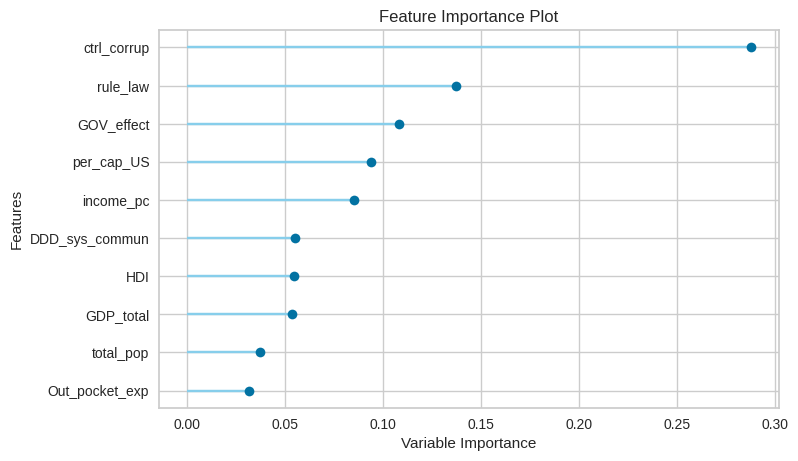

In [19]:
plot_model(et, plot='feature')

In [59]:
y_pred = predict_model(et, data=X_test)
#y_pred.head()
check_metric(y_pred.R_multi, y_pred.Label, 'R2')

Model    MAE    MSE    RMSE      R2   RMSLE    MAPE
0  Extra Trees Regressor  0.029  0.002  0.0443  0.9248  0.0362  0.2968

0.9248

In [21]:
tuned_et = tune_model(et)

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.0596  0.0091  0.0953  0.7755  0.0698  1.2116
1     0.0392  0.0029  0.0538  0.8951  0.0428  0.3457
2     0.0690  0.0114  0.1070  0.2678  0.0898  0.4192
3     0.0493  0.0067  0.0819  0.7416  0.0638  0.4261
4     0.0501  0.0058  0.0760  0.7701  0.0579  0.2593
5     0.0601  0.0070  0.0839  0.7257  0.0668  0.3905
6     0.0540  0.0072  0.0848  0.7491  0.0645  0.3501
7     0.0723  0.0102  0.1010  0.6312  0.0811  0.6213
8     0.0331  0.0019  0.0439  0.8360  0.0379  0.8698
9     0.0583  0.0076  0.0874  0.6987  0.0645  0.3197
Mean  0.0545  0.0070  0.0815  0.7091  0.0639  0.5213
Std   0.0116  0.0028  0.0187  0.1621  0.0147  0.2853

In [ ]:
#tuned_parameters = { 'learning_rate': [0.00001,0.0001,0.001],  'n_estimators': np.arange(20, 200, 20)}
#tuned_parameters = { 'learning_rate': [0.00001,0.0001,0.001],  'n_estimators': [20,50,100,200]}  
#tuned_parameters = { 'learning_rate': [0.00001,0.0001,0.001,0.01,0.1],  'n_estimators': np.arange(20, 200, 40)} 

In [22]:
print(tuned_et)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=9, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0002,
                    min_impurity_split=None, min_samples_leaf=6,
                    min_samples_split=9, min_weight_fraction_leaf=0.0,
                    n_estimators=70, n_jobs=-1, oob_score=False,
                    random_state=23, verbose=0, warm_start=False)


In [23]:
plot_model(tuned_et,save=True)

'Residuals.png'

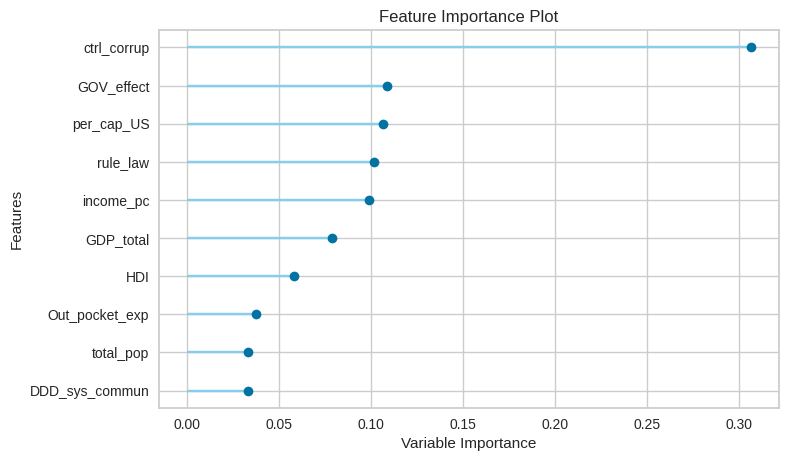

In [24]:
plot_model(tuned_et, plot='feature')

In [21]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [22]:
# y_pred = predict_model(tuned_et, data=X_test)
# check_metric(y_pred.R_multi, y_pred.Label, 'R2')

In [23]:
save_model(et,'ET_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='R_multi',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                    

In [24]:
df2 =pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : 
                   abs(et.feature_importances_)}).sort_values(by='Value', ascending=False)

In [25]:
df2

Feature     Value
8      ctrl_corrup  0.287912
10        rule_law  0.137123
9       GOV_effect  0.108106
1       per_cap_US  0.094026
5        income_pc  0.085095
0   DDD_sys_commun  0.055235
7              HDI  0.054421
2        GDP_total  0.053362
11       total_pop  0.037215
4   Out_pocket_exp  0.031514
6        rural_pop  0.031041
3       GDP_health  0.024950

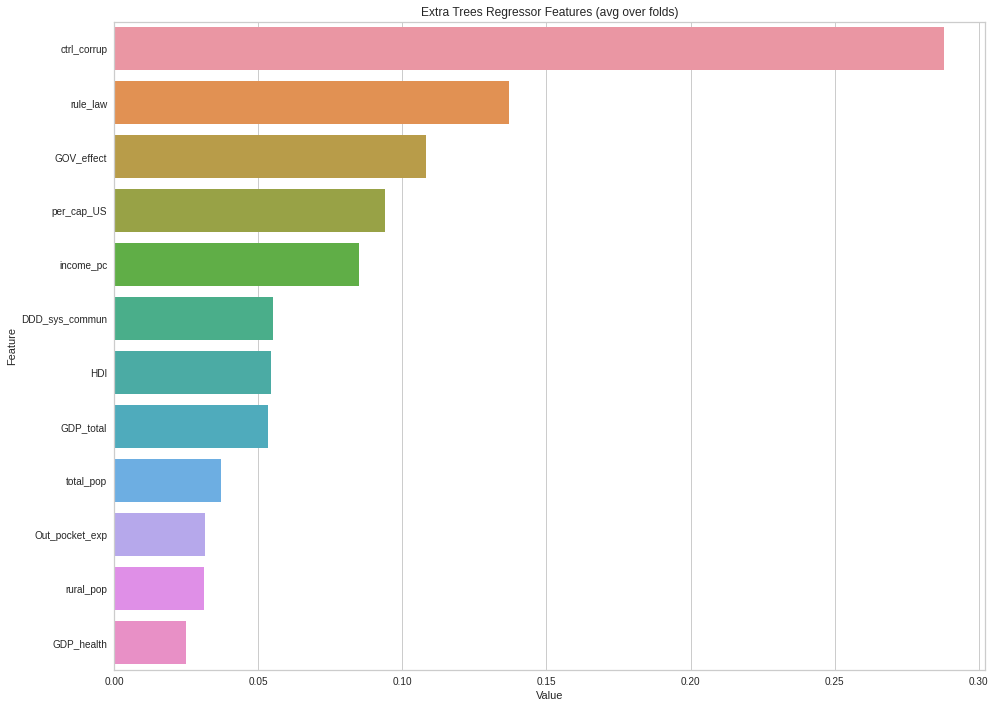

In [62]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = df2

plt.figure(figsize=(14, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Extra Trees Regressor Features (avg over folds)')
plt.tight_layout()
plt.savefig('et_importances.jpg')

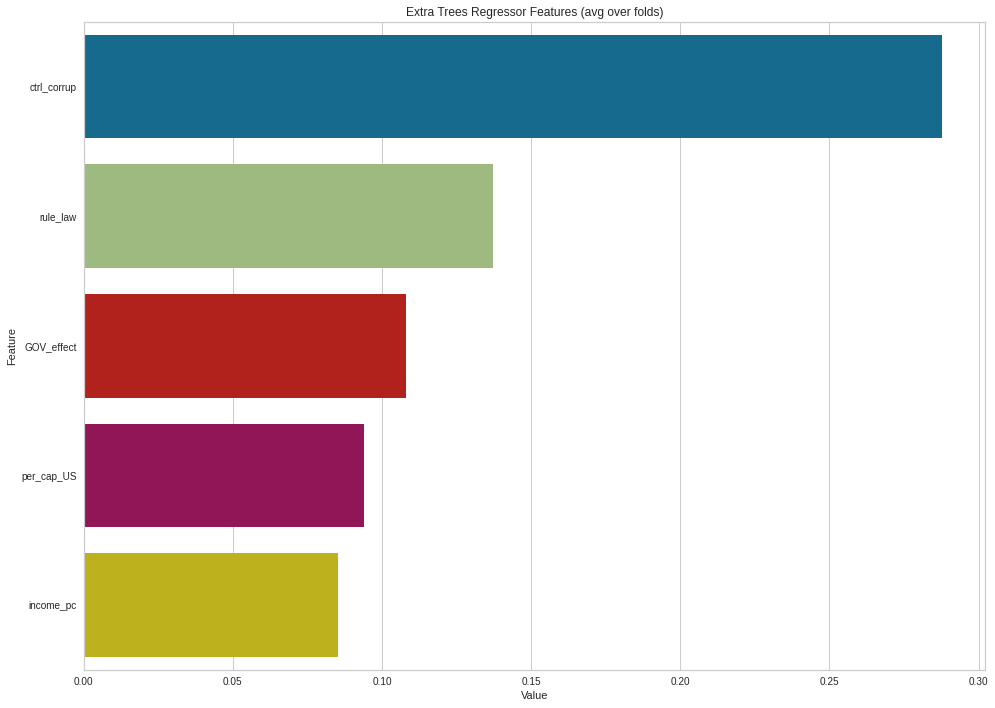

In [63]:
feature_imp = df2[:5]

plt.figure(figsize=(14, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Extra Trees Regressor Features (avg over folds)')
plt.tight_layout()
plt.savefig('et_importances_Top5.jpg')

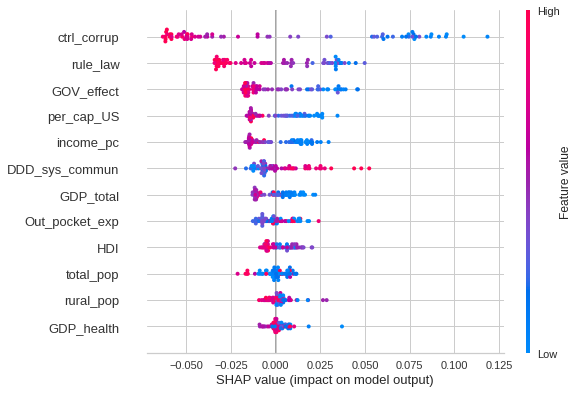

In [38]:
interpret_model(et)

In [39]:
interpret_model(et,save=True)

In [61]:
#interpret_model(et, plot = 'msa',save=True)

In [64]:
#ExplainerDashboard(et)

In [ ]:
#!pip install linearmodels

In [ ]:
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.api as sm

In [ ]:
X = df.drop(['occupancy'],axis=1)

In [ ]:
X.shape

(28288, 242)

In [ ]:
exog = sm.tools.tools.add_constant(X[['month_of_year','day_of_week','day_of_month','Capacity','Dist_bank','Dist_restaurant',
                                      'Dist_hosp','Dist_university','Dist_school','Dist_church']])
endog = df['occupancy']

In [ ]:
# random effects model
model_re = RandomEffects(endog, exog,check_rank=False) 
re_res = model_re.fit() 
#print results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:              occupancy   R-squared:                        0.0805
Estimator:              RandomEffects   R-squared (Between):              0.1688
No. Observations:               28288   R-squared (Within):               0.0786
Date:                Mon, Mar 14 2022   R-squared (Overall):              0.0903
Time:                        03:07:47   Log-likelihood                -7.228e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      247.55
Entities:                         544   P-value                           0.0000
Avg Obs:                       52.000   Distribution:                F(10,28277)
Min Obs:                       52.000                                           
Max Obs:                       52.000   F-statistic (robust):             247.55
                            

In [ ]:
model_fe = PanelOLS(endog, exog, entity_effects = True,check_rank= False,drop_absorbed=True) 
fe_res = model_fe.fit() 
#print results
print(fe_res)

/usr/local/lib/python3.7/dist-packages/linearmodels/panel/model.py:1833: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

day_of_week, is_weekend, day_of_month, month_of_year, Dist_park, Dist_coffee, Dist_clinic, Dist_club, Dist_cinema, Dist_college, Number of households with 0 vehicle, Number of households with 1 vehicles, Number of households with 2 vehicles, Number of households with 3 vehicles, Number of households with 4 vehicles, Number of households with 0 licenced drivers, Number of households with 1 licenced drivers, Number of households with 2 licenced drivers, Number of households with 3 licenced drivers, Number of households with 4 licenced drivers, Number of households with 5 or more licenced drivers, Number of households with unknown number of licenced drivers, Number of households with 0 full-time employee, Number of households with 1 full-time employees, Number of households with 2 full-time employees, Number of househol

                          PanelOLS Estimation Summary                           
Dep. Variable:              occupancy   R-squared:                        0.2106
Estimator:                   PanelOLS   R-squared (Between):           -2.22e-16
No. Observations:               28288   R-squared (Within):               0.2106
Date:                Mon, Mar 14 2022   R-squared (Overall):              0.1833
Time:                        03:01:52   Log-likelihood                -6.982e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      336.18
Entities:                         544   P-value                           0.0000
Avg Obs:                       52.000   Distribution:                F(22,27722)
Min Obs:                       52.000                                           
Max Obs:                       52.000   F-statistic (robust):             336.18
                            

In [ ]:
model_fe = PanelOLS(endog, exog, entity_effects = False,check_rank= False) 
fe_res = model_fe.fit() 
#print results
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:              occupancy   R-squared:                        0.0903
Estimator:                   PanelOLS   R-squared (Between):              0.1688
No. Observations:               28288   R-squared (Within):               0.0786
Date:                Mon, Mar 14 2022   R-squared (Overall):              0.0903
Time:                        03:13:38   Log-likelihood                 -7.38e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      280.75
Entities:                         544   P-value                           0.0000
Avg Obs:                       52.000   Distribution:                F(10,28277)
Min Obs:                       52.000                                           
Max Obs:                       52.000   F-statistic (robust):             280.75
                            